In [2]:
import numpy as np
import pandas as pd

In [3]:
#CSVを読み込む
df = pd.read_csv('data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
#英語の点数を配列に入れる
en_scores = np.array(df['英語'])[:10]
en_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
#数学の点数を配列に入れる
ma_scores = np.array(df['数学'])[:10]
ma_scores

array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82], dtype=int64)

In [6]:
#データフレームにセットする
scores_df = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [7]:
#共分散を求めるにあたり各平均を求める
summary_df = scores_df.copy()
en_mean = summary_df['英語'].mean()
en_mean

55.0

In [8]:
ma_mean = summary_df['数学'].mean()
ma_mean

71.4

In [9]:
#共分散を求めるにあたり各偏差を求める
summary_df['英語の偏差'] = summary_df['英語'] - en_mean
summary_df['数学の偏差'] = summary_df['数学'] - ma_mean
summary_df['偏差同士の積'] = summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
#偏差同士の積の平均 正の相関があると思われる
deviation_mean = summary_df['偏差同士の積'].mean()
deviation_mean

62.8

In [11]:
#共分散
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [12]:
#英語の標本分散
np.var(en_scores, ddof=0)

86.0

In [13]:
#数学の標本分散
np.var(ma_scores, ddof=0)

68.44000000000001

In [14]:
import matplotlib.pyplot as plt
from plot_util import plot_cov_interact

#点数の散布図と符号付き面積
plot_cov_interact(en_scores, ma_scores)

interactive(children=(IntSlider(value=42, description='AEnglish'), IntSlider(value=65, description='AMath'), I…

In [18]:
#相関係数
np.cov(en_scores, ma_scores, ddof=0)[0,1] / np.std(en_scores, ddof=0) / np.std(ma_scores, ddof=0)

0.8185692341186713

In [19]:
#相関係数
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [20]:
#相関係数
scores_df.corr()

,英語,数学
英語,1.000000,0.818569
数学,0.818569,1.000000


In [21]:
import matplotlib.pyplot as plt

#グラフがnotebook上に表示されるようにする
%matplotlib inline

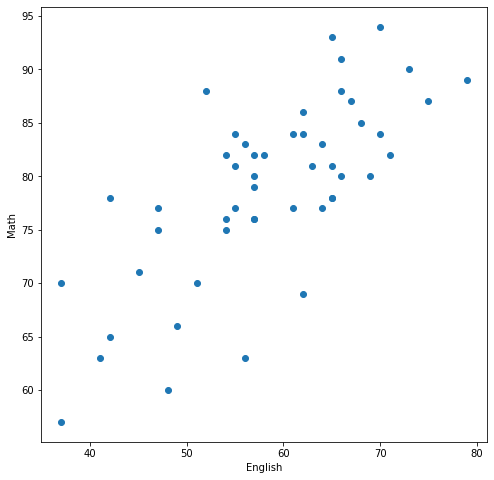

In [26]:
#散布図
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

#キャンパス
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

#散布図
ax.scatter(english_scores, math_scores)

#X軸、Y軸のラベルをセット
ax.set_xlabel('English')
ax.set_ylabel('Math')

#描画
plt.show()

In [28]:
#回帰直線を求める y = β_0 + β_1 * x
#傾きβ_1と切片β_0
poly_fit = np.polyfit(english_scores, math_scores, 1) #polyfit(x,y,deg)
poly_fit

array([ 0.62142302, 42.60132433])

In [30]:
#β_0 + β_1 * x を返す関数を作る
poly_1d = np.poly1d(poly_fit) #1次元多項式(1,2,3) -> x^1 + 2x + 3
poly_1d

poly1d([ 0.62142302, 42.60132433])

In [34]:
#X座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
xs

array([37.        , 37.85714286, 38.71428571, 39.57142857, 40.42857143,
       41.28571429, 42.14285714, 43.        , 43.85714286, 44.71428571,
       45.57142857, 46.42857143, 47.28571429, 48.14285714, 49.        ,
       49.85714286, 50.71428571, 51.57142857, 52.42857143, 53.28571429,
       54.14285714, 55.        , 55.85714286, 56.71428571, 57.57142857,
       58.42857143, 59.28571429, 60.14285714, 61.        , 61.85714286,
       62.71428571, 63.57142857, 64.42857143, 65.28571429, 66.14285714,
       67.        , 67.85714286, 68.71428571, 69.57142857, 70.42857143,
       71.28571429, 72.14285714, 73.        , 73.85714286, 74.71428571,
       75.57142857, 76.42857143, 77.28571429, 78.14285714, 79.        ])

In [36]:
#X座標に対応するY座標を作る
ys = poly_1d(xs)
ys

array([65.59397592, 66.12662422, 66.65927252, 67.19192082, 67.72456912,
       68.25721742, 68.78986572, 69.32251401, 69.85516231, 70.38781061,
       70.92045891, 71.45310721, 71.98575551, 72.51840381, 73.05105211,
       73.58370041, 74.11634871, 74.64899701, 75.18164531, 75.71429361,
       76.24694191, 76.77959021, 77.31223851, 77.8448868 , 78.3775351 ,
       78.9101834 , 79.4428317 , 79.97548   , 80.5081283 , 81.0407766 ,
       81.5734249 , 82.1060732 , 82.6387215 , 83.1713698 , 83.7040181 ,
       84.2366664 , 84.7693147 , 85.301963  , 85.8346113 , 86.3672596 ,
       86.89990789, 87.43255619, 87.96520449, 88.49785279, 89.03050109,
       89.56314939, 90.09579769, 90.62844599, 91.16109429, 91.69374259])

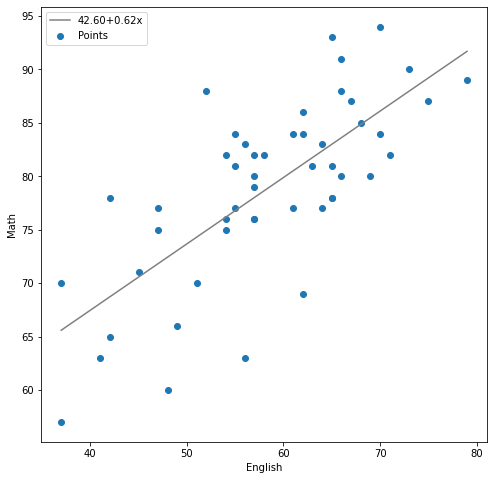

In [37]:
#キャンパス
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

#散布図
ax.scatter(english_scores, math_scores, label='Points')

#X軸、Y軸のラベルをセット
ax.set_xlabel('English')
ax.set_ylabel('Math')

#回帰直線をセット
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

#凡例の表示
ax.legend(loc='upper left')

#描画
plt.show()

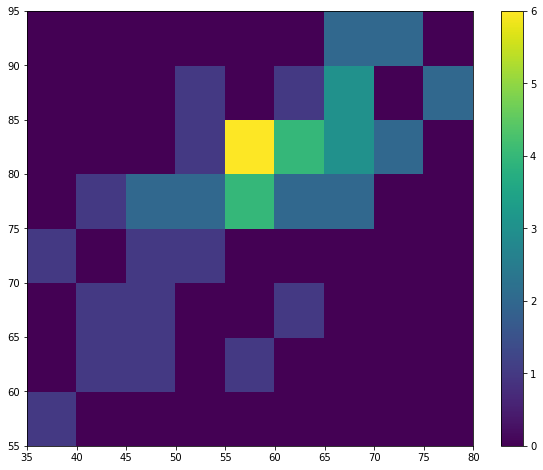

In [40]:
#ヒートマップ
#キャンパス
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35, 80), (55, 95)])

# #X軸, Y軸の目盛り
ax.set_xticks(c[1])
ax.set_yticks(c[2])

#カラーバーの表示
fig.colorbar(c[3], ax=ax)

#描画
plt.show()